In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns 
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# PR y F1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


from sklearn import metrics
from collections import Counter 

data = pd.read_csv("output/pid.csv")
data


,x,y,z,e,p,px,py,pz,m,ch,pid,pt,eta
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,3.062120e-41,7.214670e+28,3.062120e-41,7.214690e+28,7.064760e-07,3.062120e-41,7.064760e-07,4.577900e-41,7.004710e+28,4.577900e-41,3.062120e-41,7.064760e-07,0.000000
2,2.000000e+02,7.214670e+28,3.062120e-41,7.214690e+28,7.064760e-07,3.062120e-41,7.064760e-07,4.577900e-41,7.004710e+28,4.577900e-41,3.062120e-41,7.064760e-07,0.000000
3,3.960000e+02,8.970000e+02,2.000000e+00,6.010000e+02,1.007000e+03,1.007000e+03,0.000000e+00,0.000000e+00,7.004710e+28,4.577900e-41,3.062120e-41,1.007000e+03,0.000000
4,-1.403740e+01,-4.391730e+00,-3.219010e+01,9.495170e-01,1.474410e-01,-6.898330e-02,-6.729560e-03,-1.301340e-01,9.380000e-01,1.000000e+00,1.000000e+00,6.931070e-02,-1.387490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48284,9.387040e+00,-4.915580e+01,1.921000e+02,2.309440e+00,2.305310e+00,1.213950e-01,-5.643140e-01,2.231880e+00,1.380000e-01,0.000000e+00,1.010000e+02,5.772230e-01,2.061830
48285,-1.645390e+02,-6.009320e+01,-3.816220e+01,5.355460e-01,5.174610e-01,-4.665840e-01,-1.884920e-01,-1.205640e-01,1.380000e-01,1.000000e+00,1.010000e+02,5.032200e-01,-0.237351
48286,1.666670e+01,9.301060e+00,-1.954820e+02,1.508630e+00,1.502310e+00,1.332550e-01,8.415100e-02,-1.494020e+00,1.380000e-01,0.000000e+00,1.010000e+02,1.576020e-01,-2.945060
48287,-2.484270e+01,-6.170550e+01,1.712720e+02,3.642940e-01,3.371440e-01,-5.190770e-02,-1.357630e-01,3.042040e-01,1.380000e-01,-1.000000e+00,1.010000e+02,1.453480e-01,1.484440


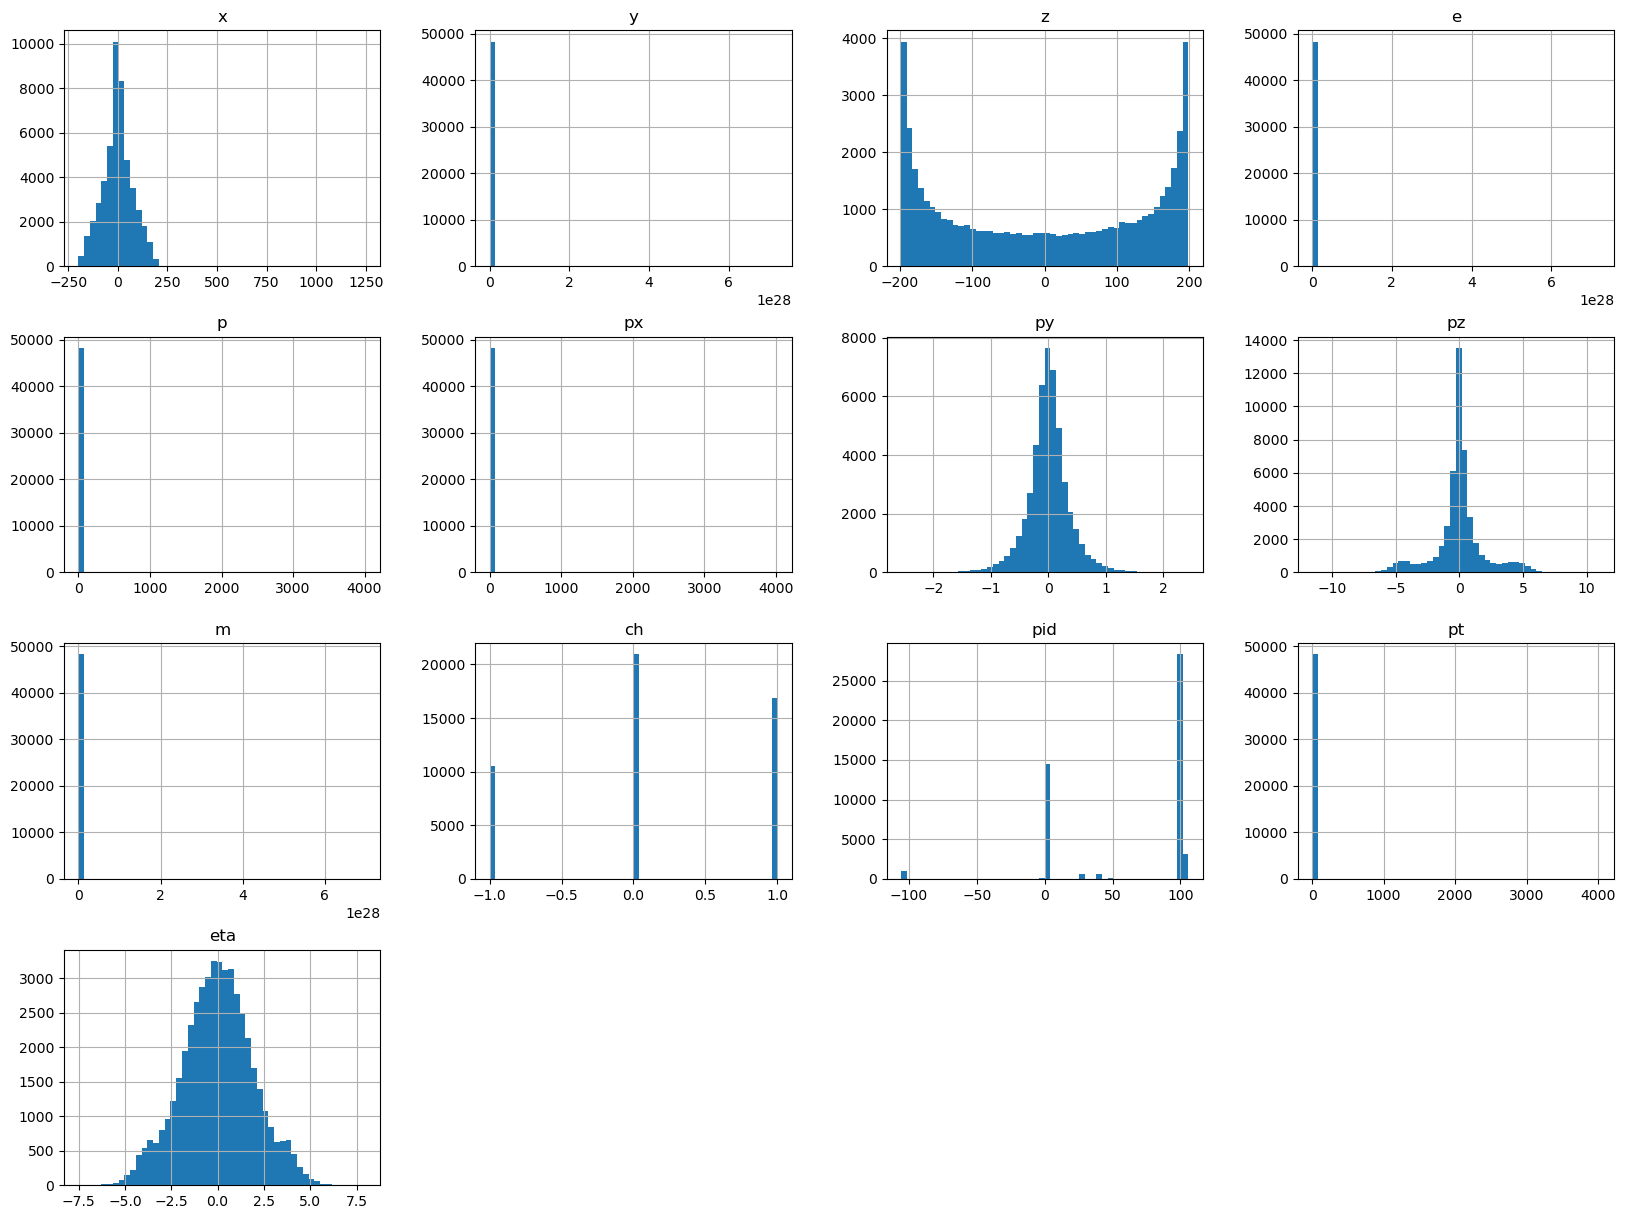

In [2]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
print(pd.value_counts(data['pid'], sort = True))

 1.010000e+02    28305
 1.000000e+00    14445
 1.060000e+02     2317
-1.060000e+02     1019
 1.020000e+02      879
 4.000000e+01      630
 2.700000e+01      575
 4.900000e+01       54
-1.000000e+00       48
-4.000000e+01       10
 3.062120e-41        3
-4.900000e+01        2
 0.000000e+00        1
-2.700000e+01        1
Name: pid, dtype: int64


In [5]:
data.loc[data['pid'] != 1, "pid"] = 0
data.loc[data['pid'] == 1, "pid"] = 1



In [6]:
#dataset = data[(data["pid"] == 101) | (data["pid"] == 1) | (data["pid"] == 106) |  (data["pid"] == 27) ]#proton, pions, K, lambda
#dataset = data[(data["pid"] == 101) | (data["pid"] == 1)| (data["pid"] == 106)]
dataset = data[4:]
print(pd.value_counts(dataset['pid'], sort = True))

0.0    33840
1.0    14445
Name: pid, dtype: int64


In [7]:
Y = dataset['pid']
X = dataset.drop('pid',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



# LinearRegression

In [8]:
#Crear modelo de regresión lineal simple con el conjunto de entrenamiento
regresion_lineal = LinearRegression() # crear lel objeto de Regresión Linear

#Ajustar el modelo usando el modelo de la clase (debe tener mismo numero de filas tanto x como y)
regresion_lineal.fit(X_train, Y_train)

#Creando un vector de predicciones, se debe tomar solo los valores independientes
Y_pred = regresion_lineal.predict(X_test)

# Error Cuadrado Medio

print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))



Mean squared error: 0.21
Coefficient of determination: 0.78


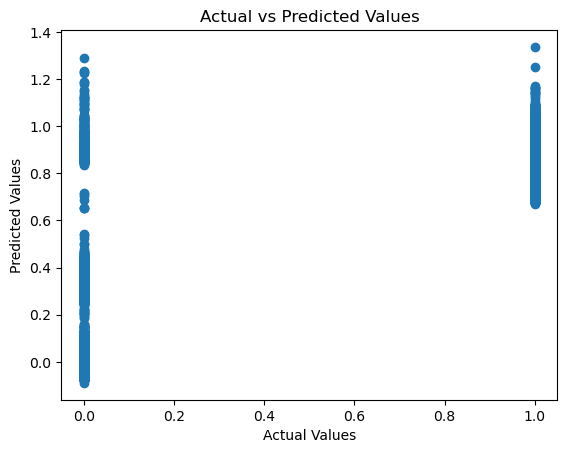

In [9]:
# Create scatter plot with actual and predicted values
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Regresión Logística

In [ ]:
#lr = LogisticRegression()
lr = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
print('beta_0:',lr.intercept_)
print('beta_1:',lr.coef_)

In [10]:
def run_model(X_train, X_test, Y_train, Y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    #clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf_base.fit(X_train, Y_train)
    return clf_base

In [11]:
def show_result(X_test, Y_test, Y_pred):
    #Generamos un clasificador sin entrenar ,  0 a todo
    ns_probs = [0 for _ in range(len(Y_test))]
    # Predecimos las probabilidades entrenando con lr
    lr_probs = model.predict_proba(X_test)
    #Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
    lr_probs = lr_probs[:, 1]
    # Calculamos el AUC
    ns_auc = roc_auc_score(Y_test, ns_probs)
    lr_auc = roc_auc_score(Y_test, lr_probs)
    #print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
    # Calculamos las curvas ROC
    ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

    conf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap = 'Blues_r')
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(Y_test, Y_pred))

    lr_precision, lr_recall, _ = precision_recall_curve(Y_test, lr_probs)
    lr_f1, lr_auc = f1_score(Y_test, Y_pred), auc(lr_recall, lr_precision)
    #print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
    print('Regresión Logística: auc=%.3f f1=%.3f ' % (lr_auc, lr_f1))
    no_train = len(Y_test[Y_test==1]) / len(Y_test)
    plt.figure(figsize=(15,10))

    plt.subplot(2,2,1)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdaderos Positivos')
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot([0, 1], [no_train, no_train], linestyle='--', label='Sin entrenar')
    plt.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
    #Etiquetas de ejes
    plt.xlabel('Sensibilidad')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()



In [12]:
model = run_model(X_train, X_test, Y_train, Y_test)
pred_y = model.predict(X_test)
show_result(X_test, Y_test, Y_pred)

/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
os_us = SMOTE()
X_train_res, Y_train_res = os_us.fit_resample(X_train, Y_train)
 
print ("before resampling {}".format(Counter(Y_train)))
print ("after resampling {}".format(Counter(Y_train_res)))
 
model = run_model(X_train_res, X_test, Y_train_res, Y_test)
Y_pred = model.predict(X_test)
show_result(X_test,Y_test, Y_pred)

# TODO
1. Normalizar
2. Balancear